# **Decision Tree Classifier**

The aim of this project is to determine whether the person is a smoker or not

### Step 1: Import the necessary libraries

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#for finding out the accuracy of the model
from sklearn import metrics

### Step 2: Load the dataset

In [2]:
df=pd.read_csv('data.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Step 4: Statistical Insights

Obtain information about various statistical data, such as mean, standard deviation, maximum value, and minimum value

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

**Missing Values**

In [8]:
#first_column = df.pop('region') 

first_column = df.pop('smoker')
 

In [9]:
df.insert(0, 'smoker', first_column)

In [10]:
df

,smoker,age,sex,bmi,children,region,charges
0,yes,19,female,27.900,0,southwest,16884.92400
1,no,18,male,33.770,1,southeast,1725.55230
2,no,28,male,33.000,3,southeast,4449.46200
3,no,33,male,22.705,0,northwest,21984.47061
4,no,32,male,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,no,50,male,30.970,3,northwest,10600.54830
1334,no,18,female,31.920,0,northeast,2205.98080
1335,no,18,female,36.850,0,southeast,1629.83350
1336,no,21,female,25.800,0,southwest,2007.94500


In [11]:
df.isnull().sum()

smoker      0
age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64

**Duplicate Values**

In [12]:
df.duplicated().sum()

1

In [13]:
dupes = df[df.duplicated(keep='first')]
 
print("Duplicate Rows :")

dupes

Duplicate Rows :


,smoker,age,sex,bmi,children,region,charges
581,no,19,male,30.59,0,northwest,1639.5631


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1337, 7)

### Step 6: Feature Selection

In [16]:
df=df.drop(['charges'], axis=1)
df.head()

,smoker,age,sex,bmi,children,region
0,yes,19,female,27.900,0,southwest
1,no,18,male,33.770,1,southeast
2,no,28,male,33.000,3,southeast
3,no,33,male,22.705,0,northwest
4,no,32,male,28.880,0,northwest


In [17]:
def gender(row):
    if row['sex']=='male':
        return 0
    else:
        return 1

In [18]:
df['sex']=df.apply(gender,axis=1)

In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
def area(row):
    if row['region']=='northeast':
        return 1
    elif row['region']=='northwest':
        return 2
    elif row['region']=='southeast':
        return 3
    else:
        return 4

In [21]:
df['region']=df.apply(area,axis=1)

In [22]:
def smoke(row):
    if row['smoker']=='yes':
        return 1
    else:
        return 0

In [23]:
df['smoker']=df.apply(smoke,axis=1)

### Step 7: Data Visualisation

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Using the **Decision Tree Classifier** Algorithm
  - wo
  - re

In [24]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [25]:
x

,age,sex,bmi,children,region
0,19,1,27.900,0,4
1,18,0,33.770,1,3
2,28,0,33.000,3,3
3,33,0,22.705,0,2
4,32,0,28.880,0,2
...,...,...,...,...,...
1333,50,0,30.970,3,2
1334,18,1,31.920,0,1
1335,18,1,36.850,0,3
1336,21,1,25.800,0,4


In [26]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",  max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7686567164179104


In [36]:
from sklearn.linear_model import LogisticRegression
# Create Decision Tree classifer object
lr = LogisticRegression(solver='liblinear')
# Train Decision Tree Classifer
lr = lr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred1= lr.predict(x_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7761194029850746


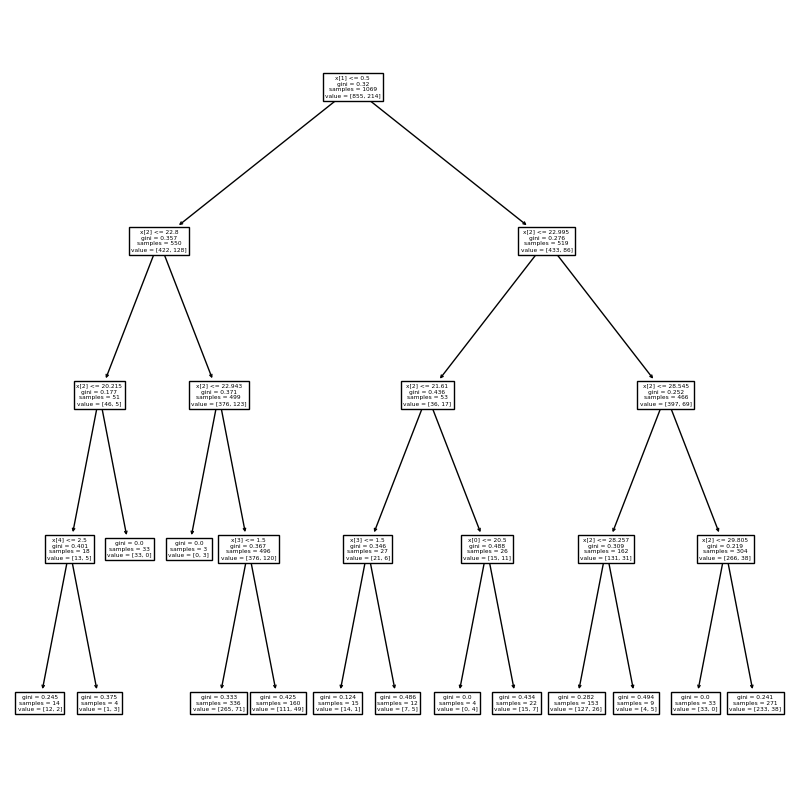

In [30]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

In [31]:
x

,age,sex,bmi,children,region
0,19,1,27.900,0,4
1,18,0,33.770,1,3
2,28,0,33.000,3,3
3,33,0,22.705,0,2
4,32,0,28.880,0,2
...,...,...,...,...,...
1333,50,0,30.970,3,2
1334,18,1,31.920,0,1
1335,18,1,36.850,0,3
1336,21,1,25.800,0,4


In [32]:
# print('Enter the details of an individual ')

# age=int(input('Age : '))
# sex=input('Sex: ')
# bmi=float(input('BMI: '))
# children=int(input('Number of children: '))
# region=input('Region: ')

# input_df = pd.DataFrame({
#       'age': age,
#       'sex': sex,
#       'bmi': bmi,
#       'children': children,
#       'region': region
#     })

# result = pipe.predict(input_df)

# if result==1:
#   print('Smoker')
# else:
#   print('Non Smoker')


In [38]:
inp = []

inp_len = int(input('Enter the number of sets you want to predict the class of : '))

for val in range(inp_len):
    print('\nSet ', val+1, ': ')
    ele = [int(input('Age : ')), int(input('Sex: ')), float(input('BMI: ')),int(input('Number of children: ')),int(input('Region: '))]
    inp.append(ele)
    

X_new = np.array(inp)

#Prediction of the species from the input vector
Y_pred = lr.predict(X_new)

print('\nPredicted Class: ')
for ans in range(inp_len):
  print('Set ', ans+1, ': ', Y_pred[ans])



Set  1 : 

Predicted Class: 
Set  1 :  0


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
